In [1]:
import pandas as pd
import numpy as np

In [12]:
team_stats_path = '../data/external/NBA_team_stats_1979-2024.csv'
player_stats_path = '../data/processed/player_data_clean.csv'
player_team_path = '../data/interim/player_data_aggregated.csv'

team_stats = pd.read_csv(team_stats_path, header=1)
player_team = pd.read_csv(player_team_path)
player_stats = pd.read_csv(player_stats_path)

team_stats = team_stats[['Season', 'Team', 'W/L%']]
player_team = player_team[['seas_id','player_id','tm']]
#player_stats.columns = player_stats.columns.str.replace('%', '')
player_stats['season'] = player_stats['season'].astype(int)
player_stats['full_season'] = player_stats['season'].apply(lambda x: f"{x-1}-{str(x)[-2:]}")
player_stats = pd.merge(player_stats, player_team, on=['seas_id', 'player_id'], how='left')

In [3]:
team_stats.head()

,Season,Team,W/L%
0,2015-16,GSW,.890
1,1995-96,CHI,.878
2,1996-97,CHI,.841
3,2016-17,GSW,.817
4,2015-16,SAS,.817


In [11]:
player_team.head()

,seas_id,player_id,tm
0,31137,5026,DAL
1,30459,5026,TOT
2,30460,5026,MIN
3,30461,5026,DAL
4,31138,5027,ATL


In [13]:
player_stats.head()

,Unnamed: 0,seas_id,season,player_id,player,age,experience,g,gs,mp,...,person_id,height,weight,pos_PG,pos_SG,pos_PF,pos_SF,pos_C,full_season,tm
0,0,31137,2024,5026,A.J. Lawson,23,2,42,0.0,311,...,1630639,78,179.0,False,True,False,False,False,2023-24,DAL
1,1,30459,2023,5026,A.J. Lawson,22,1,15,0.0,108,...,1630639,78,179.0,False,True,False,False,False,2022-23,TOT
2,3,30461,2023,5026,A.J. Lawson,22,1,14,0.0,106,...,1630639,78,179.0,False,True,False,False,False,2022-23,DAL
3,4,31138,2024,5027,AJ Griffin,20,2,20,0.0,171,...,1631100,78,220.0,False,False,False,True,False,2023-24,ATL
4,5,30467,2023,5027,AJ Griffin,19,1,72,12.0,1401,...,1631100,78,220.0,False,False,False,True,False,2022-23,ATL


In [24]:
player_stats[''].dtype


<bound method DataFrame.info of        Unnamed: 0  seas_id  season  player_id           player  age  \
0               0    31137    2024       5026      A.J. Lawson   23   
1               1    30459    2023       5026      A.J. Lawson   22   
2               3    30461    2023       5026      A.J. Lawson   22   
3               4    31138    2024       5027       AJ Griffin   20   
4               5    30467    2023       5027       AJ Griffin   19   
...           ...      ...     ...        ...              ...  ...   
11880       13540    15597    1997       2546      Stacey King   30   
11881       13543    15605    1997       3027      Steve Hamer   23   
11882       13546    15633    1997       2692      Tracy Moore   31   
11883       13547    15652    1997       2277   Wayman Tisdale   32   
11884       13548    15655    1997       2478  Willie Anderson   30   

       experience   g    gs    mp  ...  person_id  height  weight  pos_PG  \
0               2  42   0.0   311  ...

In [25]:
N = 8
#player_metrics = ['fg_per_100_poss','fga_per_100_poss','fg_percent','x3p_per_100_poss','x3pa_per_100_poss','x3p_percent','x2p_per_100_poss','x2pa_per_100_poss','x2p_percent','ft_per_100_poss','fta_per_100_poss','ft_percent','orb_per_100_poss','drb_per_100_poss','trb_per_100_poss	ast_per_100_poss','stl_per_100_poss	blk_per_100_poss','tov_per_100_poss	pf_per_100_poss	pts_per_100_poss','o_rtg'
#]
player_metrics = ["fg_per_100_poss", "fga_per_100_poss", "x3p_per_100_poss", "x3pa_per_100_poss", "x2p_per_100_poss", "x2pa_per_100_poss", "ft_per_100_poss", "fta_per_100_poss", "orb_per_100_poss", "drb_per_100_poss", "trb_per_100_poss", "ast_per_100_poss", "stl_per_100_poss", "blk_per_100_poss", "tov_per_100_poss", "pf_per_100_poss", "pts_per_100_poss", "o_rtg", "d_rtg", "avg_dist_fga", "percent_fga_from_x2p_range", "percent_fga_from_x0_3_range", "percent_fga_from_x3_10_range", "percent_fga_from_x10_16_range", "percent_fga_from_x16_3p_range", "percent_fga_from_x3p_range", "fg_percent_from_x2p_range", "fg_percent_from_x0_3_range", "fg_percent_from_x3_10_range", "fg_percent_from_x10_16_range", "fg_percent_from_x16_3p_range", "fg_percent_from_x3p_range", "percent_assisted_x2p_fg", "percent_assisted_x3p_fg", "percent_dunks_of_fga", "num_of_dunks", "percent_corner_3s_of_3pa", "corner_3_point_percent", "num_heaves_attempted", "num_heaves_made", "per", "x3p_ar", "f_tr", "orb_percent", "drb_percent", "trb_percent", "ast_percent", "stl_percent", "blk_percent", "tov_percent", "usg_percent", "ows", "dws", "ws", "ws_48", "obpm", "dbpm", "bpm", "vorp"
]

In [26]:
final_data = []

# Process each season and team
for (season, team), group in player_stats.groupby(['full_season', 'tm']):
    # Sort players by a criterion, e.g., minutes played (assuming 'MP' column exists)
    top_players = group.sort_values(by='mp', ascending=False).head(N)
    
    # Create a dictionary to hold the data for this team-season
    team_data = {'Season': season, 'Team': team}
    
    # Add team stats
    team_stats_row = team_stats[(team_stats['Season'] == season) & (team_stats['Team'] == team)]
    if not team_stats_row.empty:
        team_data.update(team_stats_row.iloc[0].to_dict())
    
    # Add player metrics
    for i, player in enumerate(top_players.itertuples(), start=1):
        for metric in player_metrics:
            team_data[f'Player{i}_{metric}'] = getattr(player, metric) if hasattr(player, metric) else player._asdict().get(metric, 0)
    
    # Fill missing player slots with zeros if less than N players
    for i in range(len(top_players) + 1, N + 1):
        for metric in player_metrics:
            team_data[f'Player{i}_{metric}'] = 0
    
    # Append the team data to the list
    final_data.append(team_data)


In [27]:
final_data_df = pd.DataFrame(final_data)
final_data_df = final_data_df.dropna(subset=['W/L%'])
final_data_df

,Season,Team,W/L%,Player1_fg_per_100_poss,Player1_fga_per_100_poss,Player1_x3p_per_100_poss,Player1_x3pa_per_100_poss,Player1_x2p_per_100_poss,Player1_x2pa_per_100_poss,Player1_ft_per_100_poss,...,Player8_tov_percent,Player8_usg_percent,Player8_ows,Player8_dws,Player8_ws,Player8_ws_48,Player8_obpm,Player8_dbpm,Player8_bpm,Player8_vorp
0,1996-97,ATL,.683,9.6,19.9,0.5,1.5,9.1,18.3,6.3,...,27.2,35.7,-0.5,0.3,-0.2,-0.048,-8.0,-0.9,-8.9,-0.3
2,1996-97,CHH,.659,11.6,24.4,3.3,7.1,8.3,17.3,7.5,...,19.6,18.8,1.0,0.6,1.6,0.087,0.9,-0.6,0.3,0.5
3,1996-97,CHI,.841,15.8,32.5,1.9,5.1,13.9,27.4,8.2,...,14.1,12.1,0.1,1.1,1.2,0.082,-1.7,0.9,-0.9,0.2
4,1996-97,CLE,.512,7.4,16.3,1.6,4.0,5.8,12.3,3.2,...,14.8,19.7,-0.2,0.8,0.6,0.053,-2.6,0.3,-2.3,0.0
5,1996-97,DAL,.293,7.3,16.4,1.5,4.3,5.8,12.1,2.3,...,11.8,22.7,-0.2,0.6,0.4,0.021,-1.4,-1.0,-2.3,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,2023-24,POR,.256,11.8,20.7,0.0,0.3,11.8,20.5,1.8,...,12.3,19.1,-0.1,0.2,0.2,0.044,-4.1,-2.4,-6.5,-0.2
854,2023-24,SAC,.561,10.5,17.7,0.5,1.4,10.0,16.3,4.8,...,10.4,14.9,0.0,0.7,0.7,0.047,-3.5,0.1,-3.4,-0.2
855,2023-24,SAS,.268,7.4,16.8,1.5,4.9,5.8,11.9,2.4,...,9.7,14.9,0.5,0.2,0.8,0.053,-1.0,-1.8,-2.9,-0.2
856,2023-24,TOR,.305,10.3,21.7,2.3,6.8,8.0,14.9,4.5,...,9.8,17.3,1.2,0.6,1.7,0.119,-0.3,-1.4,-1.7,0.1


In [29]:
final_data_df.to_csv('../data/interim/NBA_team_player_stats.csv', index=False)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
data_path = '../data/interim/NBA_team_player_stats.csv'
data = pd.read_csv(data_path)

In [32]:
X = data.drop(columns=['W/L%', 'Season', 'Team'])
y = data['W/L%']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - MSE: {mse:.4f}, R²: {r2:.4f}")

Linear Regression - MSE: 0.0070, R²: 0.6509


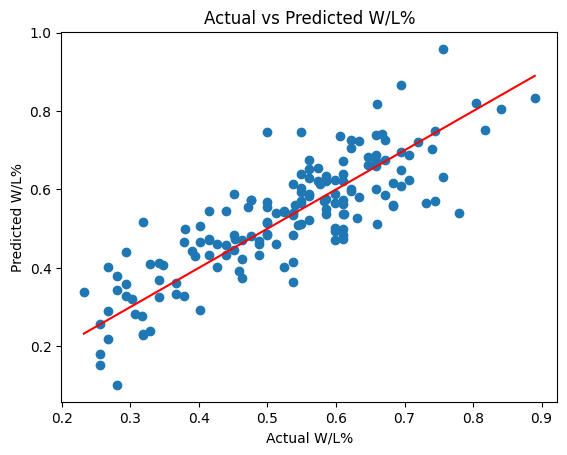

In [37]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual W/L%')
plt.ylabel('Predicted W/L%')
plt.title('Actual vs Predicted W/L%')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.show()

Feature Importance:
                                Feature   Coefficient
47                  Player1_stl_percent  1.208651e+12
130            Player3_stl_per_100_poss  2.927932e+11
106                 Player2_stl_percent  2.883053e+11
100                      Player2_x3p_ar  1.545108e+11
79   Player2_percent_fga_from_x2p_range  1.200821e+11
..                                  ...           ...
379  Player7_percent_fga_from_x3p_range -9.081220e+10
143  Player3_percent_fga_from_x3p_range -9.275505e+10
71             Player2_stl_per_100_poss -2.883053e+11
165                 Player3_stl_percent -2.927932e+11
12             Player1_stl_per_100_poss -1.208651e+12

[472 rows x 2 columns]


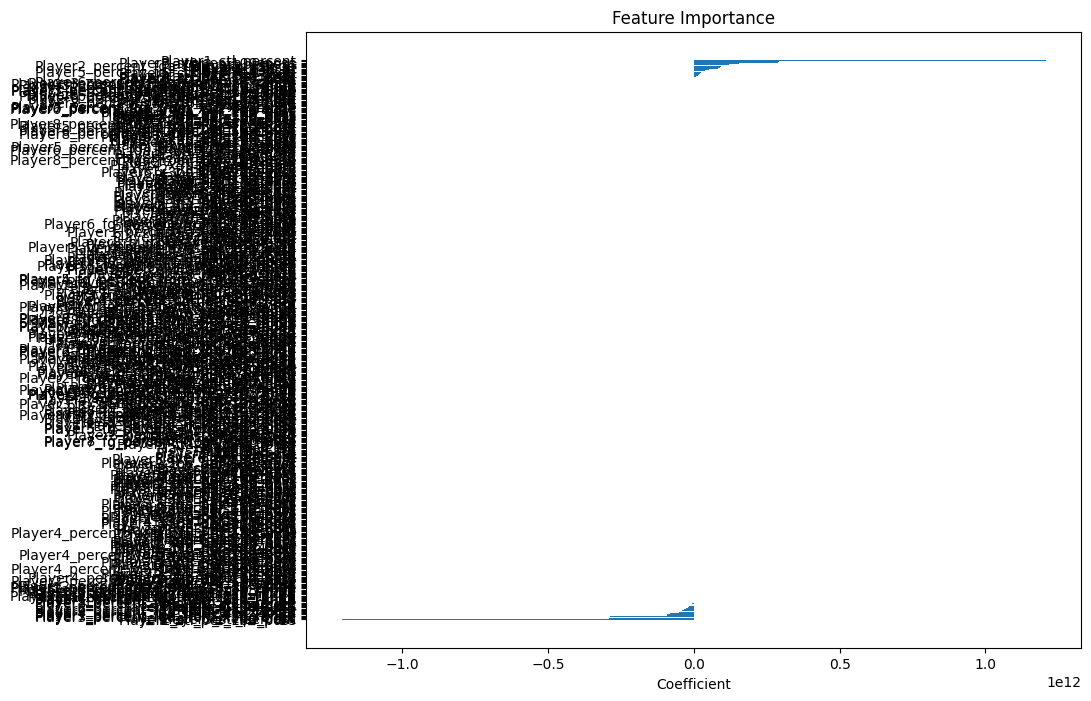

In [38]:
# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

print("Feature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()